In [234]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
#plt.style.use('classic')


In [235]:
df = pd.read_csv("cubic_zirconia.csv")  

In [236]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [237]:
df.shape

(26967, 11)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [239]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [240]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [241]:
df.duplicated().sum() # Check for duplicated rows

34

In [242]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [243]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [244]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [245]:
df = df.fillna(df.median())


In [246]:
df[df.isnull().any(axis=1)].sum() # Count number of null values

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price      0.0
dtype: float64

In [247]:
df.head(27)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [248]:
df.shape

(26967, 10)

In [249]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [250]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

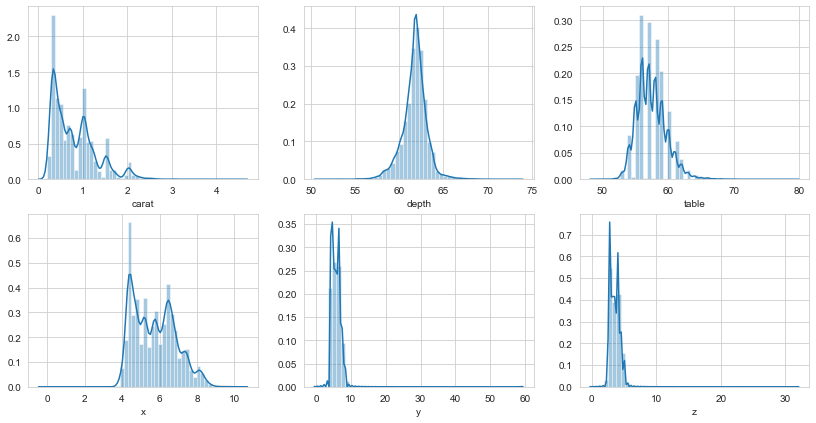

In [251]:
#plt.figure(figsize=(5,10)) # makes the plot wider
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3,figsize=(14,7))
sns.distplot(df['carat'],ax=axes[0,0])
sns.distplot(df['depth'],ax=axes[0,1])
sns.distplot(df['table'],ax=axes[0,2])
sns.distplot(df['x'],ax=axes[1,0])
sns.distplot(df['y'],ax=axes[1,1])
sns.distplot(df['z'],ax=axes[1,2])



In [253]:
zerovals=(df[df['z']==0])
zerodex=[]
for i in zerovals.index:
    zerodex.append(i)
df = df.drop(df.index[zerodex])
for i in cdf.columns:
    print("Column name :",i)
    print("\n\n")
    print(df[df[i]==0])

Column name : carat



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
Column name : depth



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
Column name : table



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
Column name : x



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
Column name : y



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
Column name : z



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []
Column name : price



Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []


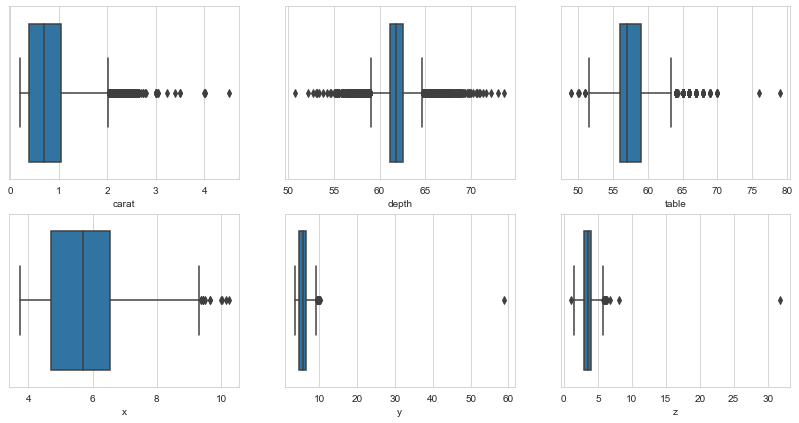

In [254]:
# construct box plot for continuous variables
#sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3,figsize=(14,7))
#sns.boxplot(vert=0)
#plt.title('With Outliers',fontsize=16)
sns.boxplot(df['carat'],ax=axes[0,0])
sns.boxplot(df['depth'],ax=axes[0,1])
sns.boxplot(df['table'],ax=axes[0,2])
sns.boxplot(df['x'],ax=axes[1,0])
sns.boxplot(df['y'],ax=axes[1,1])
sns.boxplot(df['z'],ax=axes[1,2])
plt.show()


    

In [255]:
#from scipy.stats import zscore # Compute the Z-Score for all columns
#ztest=df[cont].apply(zscore)
#ztest.describe()

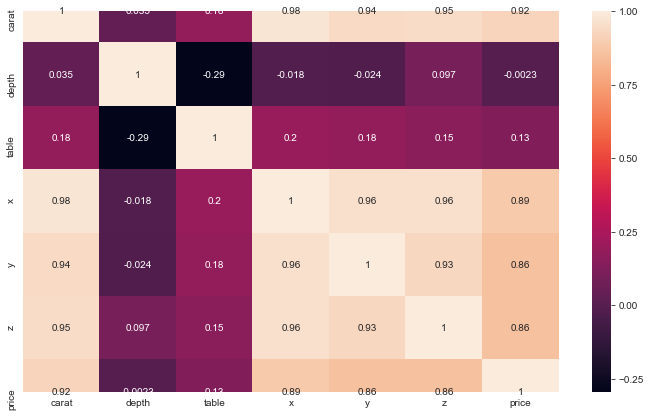

In [256]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:].corr(),annot=True)

In [257]:
df.drop(['y','z'],axis=1,inplace=True)

In [258]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [259]:
cdf.drop(['y','z'],axis=1,inplace=True)
for column in cdf.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

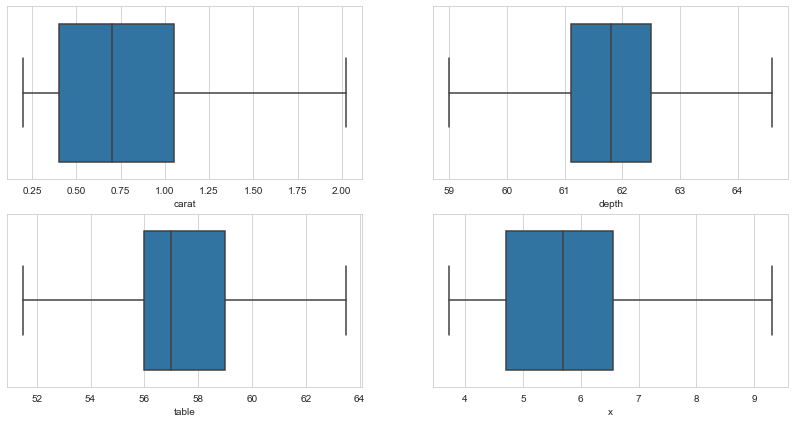

In [260]:
fig, axes = plt.subplots(2,2,figsize=(14,7))
#sns.boxplot(vert=0)
#plt.title('With Outliers',fontsize=16)
sns.boxplot(df['carat'],ax=axes[0,0])
sns.boxplot(df['depth'],ax=axes[0,1])
sns.boxplot(df['table'],ax=axes[1,0])
sns.boxplot(df['x'],ax=axes[1,1])
#sns.boxplot(df['y'],ax=axes[1,1])
#sns.boxplot(df['z'],ax=axes[1,2])
plt.show()
plt.show()

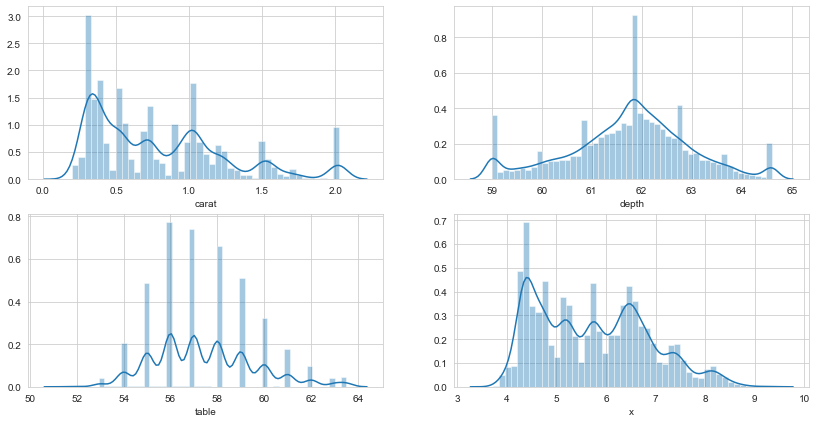

In [261]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,2,figsize=(14,7))
sns.distplot(df['carat'],ax=axes[0,0])
sns.distplot(df['depth'],ax=axes[0,1])
sns.distplot(df['table'],ax=axes[1,0])
sns.distplot(df['x'],ax=axes[1,1])
#sns.distplot(df['y'],ax=axes[1,1])
#sns.distplot(df['z'],ax=axes[1,2])

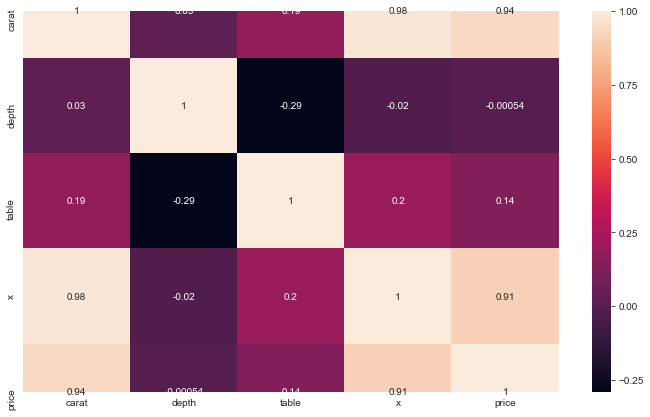

In [262]:
#plt.figure(figsize=(10,8))
#sns.heatmap(data=df.corr(), annot=True, linewidths=.5, fmt= '.2f' , center = 0)  # heatmap
#plt.show()

plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:].corr(),annot=True)

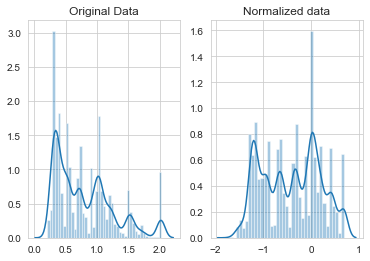

In [352]:
from scipy import stats
original=df[['carat','depth','table','x']]
original_data=original.to_numpy()

#normalize the exponential data with boxcox
normalized_data=stats.boxcox(original_data[:,0])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data[:,0],ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In [376]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
original=df[['carat','depth','table','x']]
original_data=original.to_numpy()

In [377]:
pt.fit(original_data)


PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [378]:
normalized_data=pt.transform(original_data)

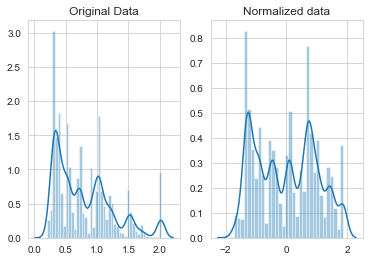

In [385]:
#print(normalized_data);
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data[:,0],ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[:,0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In [384]:
normalized_data[:,0]

array([-1.34228598, -1.2060738 ,  0.50327708, ..., -0.51262388,
       -1.48558715,  1.09117728])

In [354]:
df.head(4)

,carat,cut,color,clarity,depth,table,x,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,1082.0


In [360]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [361]:
df.head(4)

,carat,cut,color,clarity,depth,table,x,price
0,0.30,2,1,2,62.1,58.0,4.27,499.0
1,0.33,3,3,1,60.8,58.0,4.42,984.0
2,0.90,4,1,7,62.2,60.0,6.04,6289.0
3,0.42,2,2,4,61.6,56.0,4.82,1082.0


In [390]:
X = df.drop('price', axis=1) # Independent variables
y = df[['price']] # Dependent variables

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [393]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [394]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9348.139465521395
The coefficient for cut is 53.08978994202909
The coefficient for color is -226.16363633717097
The coefficient for clarity is 246.36257273027937
The coefficient for depth is -119.78894618013518
The coefficient for table is -78.55564083570599
The coefficient for x is -745.8281008051404


In [395]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 12018.152807090666


In [399]:
print("The Train data is :", regression_model.score(X_train, y_train))
print("The Test score is :",regression_model.score(X_test, y_test))

The Train data is : 0.9097422358134504
The Test score is : 0.9071618638448781


In [400]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

In [402]:
from sklearn.metrics import mean_squared_error
scores_train.append(regression_model.score(X_train, y_train))
scores_test.append(regression_model.score(X_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

In [403]:
print(rmse_train)

[1038.0198703370652]


In [410]:
print(rmse_test)

[1067.1828810124236]


In [409]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
print("mean squre error :",mse)
import math
math.sqrt(mse)

mean squre error : price    1.138879e+06
dtype: float64


1067.1828810124216

In [408]:
mse


price    1.138879e+06
dtype: float64

In [411]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,price
7598,0.71,4,3,4,63.3,59.0,5.52,2768.0
8882,0.30,4,1,5,62.9,58.0,4.27,544.0
22763,0.70,1,4,5,63.9,59.0,5.64,2351.0
6643,0.36,2,1,5,60.2,56.0,4.65,1080.0
18701,1.66,4,5,2,63.0,57.0,7.45,8901.0


In [413]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x', data = data_train).fit()
lm1.params

Intercept    12018.152807
carat         9348.139466
cut             53.089790
color         -226.163636
clarity        246.362573
depth         -119.788946
table          -78.555641
x             -745.828101
dtype: float64

In [414]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.716e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:47:42   Log-Likelihood:            -1.5783e+05
No. Observations:               18870   AIC:                         3.157e+05
Df Residuals:                   18862   BIC:                         3.157e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.202e+04    575.541     20.881      0.0